In [57]:
import numpy as np
import matplotlib.pyplot as plt

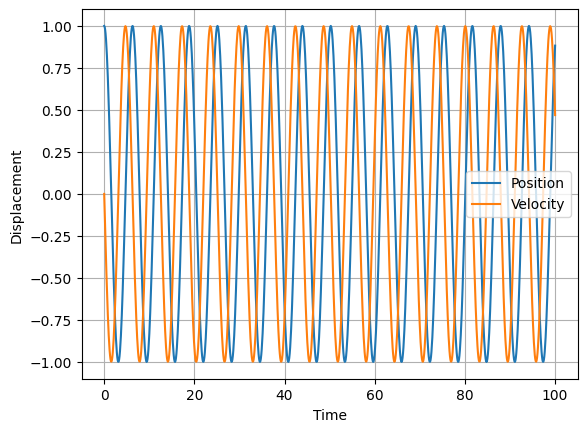

In [58]:
#Timestep
N = 1000 
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

#Paramters
k = 1
m = 1
x0 = 1
v0 = 0
w = 1 #w = sqrt.(k/m) = 1

#Modified Leapfrog Integrator
def integrator(x0, v0, w, N, dt): 
     x = np.zeros(N)
     v = np.zeros(N)

     #Initial positions
     x[0] = x0 
     v[0] = v0
     
     #Equations of Motion
     for i in range(N-1):
        v[i+1] = v[i] + x[i] * (-w**2) * 0.5 * dt
        x[i+1] = x[i] + v[i+1] * dt
        v[i+1] = v[i+1] + x[i+1] * (-w**2) * 0.5 * dt

     return x,v
     
x,v = integrator(x0, v0, w, N, dt)
     
plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()


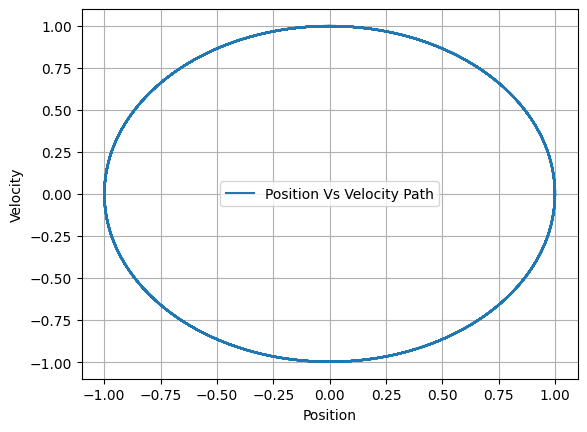

In [59]:
plt.figure()
plt.plot(x,v, label = "Position Vs Velocity Path")
plt.xlabel("Position")
plt.ylabel("Velocity")
plt.legend()
plt.grid()
plt.show()

In [60]:
#Energy using modified version
KE = 0.5 * m * v**2
PE = 0.5 * k * x**2
E = PE + KE

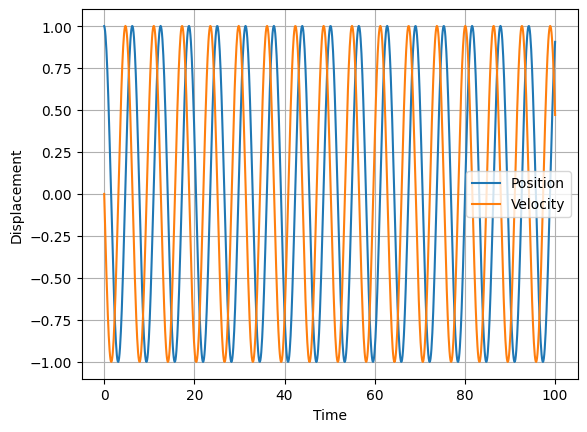

In [61]:
#Original Leapfrog Integrator
def integrator_original(x0, v0, w, N, dt): 
     x = np.zeros(N)
     v = np.zeros(N)

     #Initial positions
     x[0] = x0 
     v[0] = v0
     
     #Equaitons of Motion
     for i in range(N-1):
        v[i+1] = v[i] + x[i] * (-w**2) * dt
        x[i+1] = x[i] + v[i+1] * dt
        
     return x,v

x,v = integrator_original(x0, v0, w, N, dt)

plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

In [62]:
E_original = 0.5 * m * v**2 + 0.5 * k * x**2

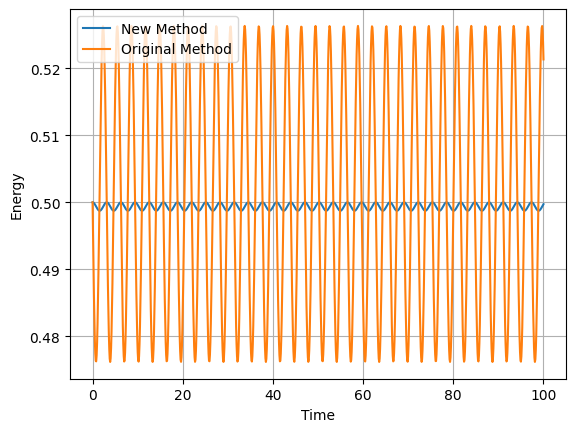

In [63]:
#Plot comparison of the two forms of Leapfrog Integration

plt.figure()
plt.plot(t, E, label = 'New Method')
plt.plot(t, E_original, label = 'Original Method')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

# 2D Simple Harmonic Oscillator

In [64]:
import ipywidgets as wd
from mpl_toolkits.mplot3d import Axes3D

In [65]:
#Parameters

k_x = 1
k_y = 1
m = 1
x0 = 1
y0 = 1
v_x0 = 0
v_y0 = 0
w_x = 2 
w_y = 1

In [66]:
#2D Leapfrog Integrator
def integrator_2d(x0, y0, v_x0, v_y0, w_x, w_y, N, dt): 
     x = np.zeros(N)
     y = np.zeros(N)
     v_x = np.zeros(N)
     v_y = np.zeros(N)

     #Initial positions
     x[0] = x0 
     y[0] = y0
     v_x[0] = v_x0
     v_y[0] = v_y0

     #Equations of Motion
     for i in range(N-1):
         v_x[i+1] = v_x[i] + x[i] * (-w_x**2) * 0.5 * dt
         v_y[i+1] = v_y[i] + y[i] * (-w_y**2) * 0.5 * dt
         x[i+1] = x[i] + v_x[i+1] * dt
         y[i+1] = y[i] + v_y[i+1] * dt
         v_x[i+1] = v_x[i+1] + x[i+1] * (-w_x**2) * 0.5 * dt
         v_y[i+1] = v_y[i+1] + y[i+1] * (-w_y**2) * 0.5 * dt

     return x,y,v_x, v_y
     
x,y,v_x,v_y = integrator_2d(x0, y0, v_x0, v_y0, w_x, w_y, N, dt)


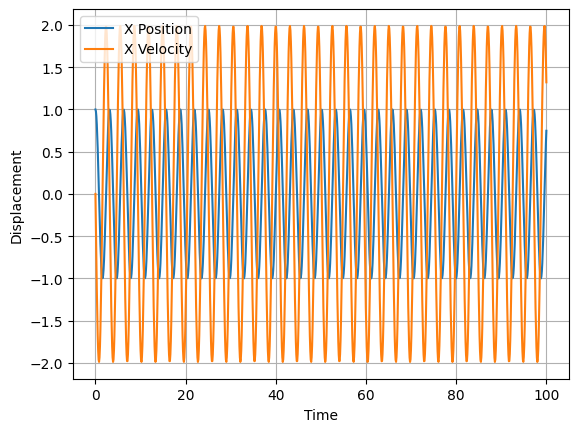

In [67]:
plt.figure()
plt.plot(t, x, label = 'X Position')
plt.plot(t, v_x, label = 'X Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

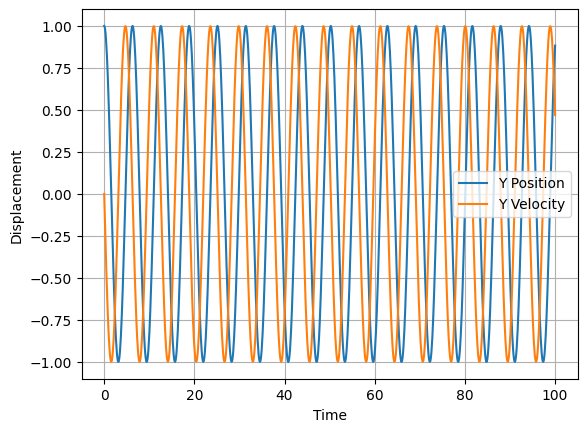

In [68]:
plt.figure()
plt.plot(t, y, label = 'Y Position')
plt.plot(t, v_y, label = 'Y Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

In [69]:
def my_cube_plot(x, y, v_x, v_y, t, w_x, w_y, my_azimuth, my_elevation):
    fig, ax = plt.subplots(
        subplot_kw={'projection': '3d'},
        figsize = (9, 9), 
        constrained_layout = True
        )
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Time')  

    ax.plot(x, v_x, t,
            color = 'Firebrick',
            marker = 'None',
            label = 'X Position and Velocity',
            linestyle = '--',
            linewidth = 3)
    
    ax.plot(y, v_y, t,
              color = 'b',
              label = 'Y Position and Velocity',
              linestyle = '--',
              linewidth = 3)

    ax.legend()
    ax.view_init(azim = my_azimuth, elev = my_elevation)
    
    plt.show()

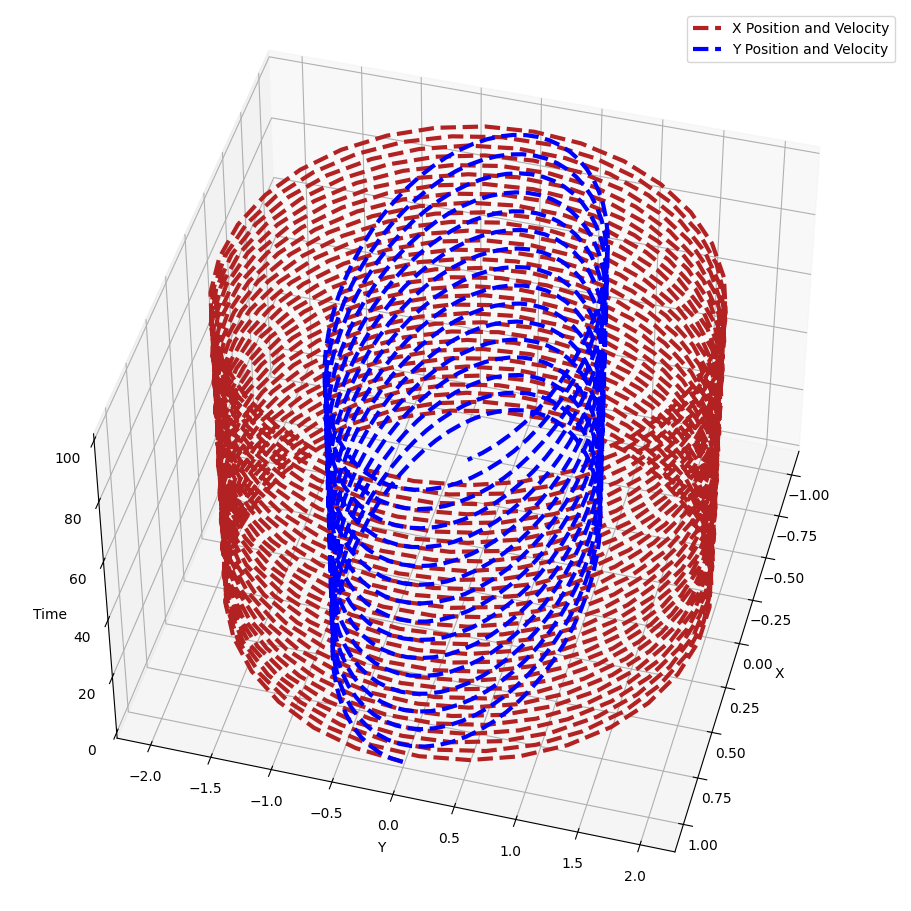

In [70]:
my_cube_plot(x, y, v_x, v_y, t, w_x, w_y, my_azimuth = 15, my_elevation = 45
)

In [71]:
#Energy
Energy = 0.5*m* ((v_x**2 + w_x**2 * x **2) + (v_y**2 + w_y**2 * y ** 2))

# Bouncing Ball
H = 0.5*v**2 + G * |x|

In [72]:
from scipy import constants as const

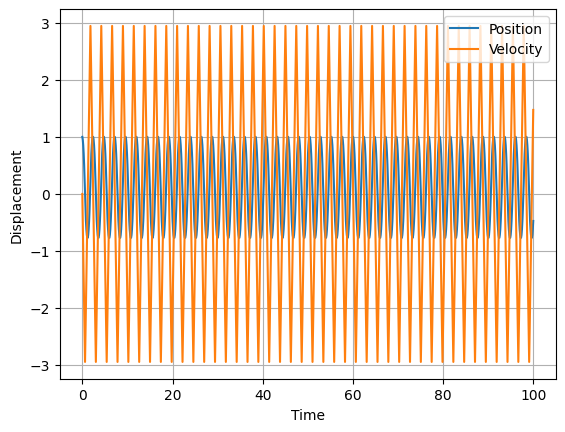

In [73]:
N = 1000 
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0

def force(x):
    return -const.g * np.sign(x)

def leapfrog(x0, v0, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i])
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i] + 0.5 * dt * force(x[i])

    return x,v

x, v = leapfrog(x0, v0, dt, N)

plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()